 # GUI를 통한 서울 시간대별 유동인구 분석 프로젝트

 ### 파이썬의 표준 GUI tkinter

In [1]:
from tkinter import *

In [2]:
root = Tk()
root.title('my first tkinter')
root.geometry('400x400')
root.resizable(False, True)
root.mainloop()

### 위젯 다루기

In [6]:
root = Tk()  # 실행했을 떄 나타나는 창이 바로 이 코드의 root
root.title('my first tkinter')
root.geometry('400x200+0+300') # 넓이 x 높이 + (x축왼쪽에서거리) + (y축왼쪽에서거리)

# Label 클래스의 첫 번째 인수로 root 사용, 이는 root 창에 포함되는 컴포넌트로 생성함.
label1 = Label(root, text='안녕하세요!')
label1.pack() # label.pack()은 label 객체를 창에 표시하는 역할

# root.mainloop()는 root창을 이벤트 루프에 들어가도록 함.
# mainloop()에 의해 root창은 계속 이벤트를 수신하고 사용자의 입력을 처리
root.mainloop()

In [13]:
def sayhello():
    print('Hello!' * 3)
    
root = Tk()
root.title('Button')
root.geometry('400x200')

lbl1 = Label(root, text='안녕하세요!', width=10)
lbl1.grid(row=0, column=0)
btn1 = Button(root, text='확인', width=10, command=sayhello)
btn1.grid(row=0, column=1)

root.mainloop()

Hello!Hello!Hello!
Hello!Hello!Hello!


In [16]:
# ------ 프로그램 기능 부분 ------
def sayhello():
    txt.set('Hello!' * 3) # sayhello() 함수 실행 시 동적 변수 txt에 값 넣기
    
# ------ 프로그램 화면 부분 ------
root = Tk()
root.title('Button')
root.geometry('400x400')

lbl1 = Label(root, text='안녕하세요!', width=10)
lbl1.grid(row=0, column=0)
btn1 = Button(root, text='확인', width=10, command=sayhello)
btn1.grid(row=0, column=1)

txt = StringVar() # 동적변수 txt 정의(레이블에 동적변수 txt 설정)
lbl2 = Label(root, textvariable = txt, width=10, height=3)
lbl2.grid(row=1, column=0, columnspan=2)

root.mainloop()

# 시간별 유동인구 분석 프로젝트에 화면 입히기

In [14]:
import csv
import datetime
import matplotlib.pyplot as plt
from tkinter import *

# 1. 로우 데이터(인구, 동코드) 오픈 함수
def file_open():
    # 1-1. 인구 데이터 파일 읽기
    filePath = './seoul_dong_people_201912.csv'
    f = open(filePath, encoding='utf8')
    data = csv.reader(f)
    next(data)
    data = list(data) 
    
    # 1-2. 행정동코드 데이터 파일 읽기
    f2 = open('./dong_code.csv', encoding='cp949')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 1-3. 데이터타입 변환하기 : 문자 -> 숫자
    # 인구데이터의 변환하기
    for row in data :
        for i in range(1, 32):
            if i <= 2: # 인덱스가 2이하인 경우(시간대구분, 행정동코드 등)
                row[i] = int(row[i]) # 정수형으로 변환
            else : # 인덱스다 2초과인 경우(총생활인구수부터)
                row[i] = float(row[i]) # 실수형으로 변환
    
    # 행정동의 코드 변환하기
    for row in code_data :
        row[1] = int(row[1])
    
    return data, code_data

# 2. 동명1 입력칸에 입력된 동명을 이용헤서 동코드 검색
def dong_search1():
    global dong_name1, dong_code1
    dong_name1 = dong_ent1.get()
    
    for row in code_data :
        if row[-1] == dong_name1:
            dong_code1 = row[1]
    info.set(dong_name1 + '-' + str(dong_code1) + '을/를 분석합니다.')
    
# 3. 동명2 입력칸에 입력된 동명을 이용해서 두 번째 동코드 검색
def dong_search2():
    global dong_name2, dong_code2
    dong_name2 = dong_ent2.get()
    
    for row in code_data :
        if row[-1] == dong_name2:
            dong_code2 = row[1]
    info.set(dong_name2 + '과' + dong_code2 + '을/를 분석합니다.')
    
# 4. 그래프 그리는 함수
def graph_plot(popu_list, label_list, graph_tilte) :
    plt.figure(figsize=(10,5)) # 그래프 크기 설정
    plt.rc('font', family='AppleGothic')
    plt.title(graph_tilte)
        
    for i in range(len(popu_list)) :
        plt.plot(range(24), popu_list[i], label = label_list[i])
            
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.savefig('graph.png') # 그래프 결과를 이미지로 저장
    plt.show()
    
    # 그래프 이미지를 PhotoImage객체로 만들고, 라벨 graph_lbl 표시하기
    graph_img = PhotoImage(file='graph.png')
    graph_lbl.configure(image = graph_img)
    graph_lbl.image = graph_img
    
# 5. 일별 인구 분석 및 시각화
def analysis1(graph_yn = 'y'):
    population = [0 for i in range(24)]
    for row in data :
        if row[2] == dong_code1 :
            time , p = row[1], row[3]
            population[time] += p
    population = [p / 31 for p in population]
        
    if graph_yn == 'n' :
        return population
        
    population = [population]
    labels = ['평균인구']
    title = dong_name1 + ' 시간대별 평균인구 그래프'
    graph_plot(popu_list= population, label_list= labels, graph_tilte=title)
    
# 6. 주중/주말 인구 분석 및 시각화
def analysis2():
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]
        
    for row in data :
        if row[2] == dong_code1 :
            time, p = row[1], row[3]
            year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5:
                weekday[time] += p
            else :
                weekend[time] += p
            
    weekday_cnt, weekend_cnt = 0, 0
    
    for i in range(1, 32) :
        if datetime.date(2019, 12, i).weekday() < 5 :
            weekday_cnt += 1
        else :
            weekend_cnt += 1
    
    weekday = [w / weekday_cnt for w in weekday]
    weekend = [w / weekend_cnt for w in weekend]
        
    data_set = [weekday, weekend]
    labels = ['평일', '주말']
    title = dong_name1 + '평일/주말 시간대별 인구'
    graph_plot(popu_list=data_set, label_list=labels, graph_tilte=title)
    
# 7. 남/녀 인구 분석 및 시각화
def analysis3():
    male = [0 for i in range(24)]
    female = [0 for i in range(24)]
        
    for row in data :
        if row[2] == dong_code1 :
            time = row[1]
            male[time] += sum(row[4:18])
            female[time] += sum(row[18:32])
                
    male = [m / 31 for m in male]
    female = [f / 31 for f in female]
        
    data_set = [male, female]
    labels = ['남성', '여성']
    title = dong_name1 + '평일/주말 시간대별 인구'
    graph_plot(popu_list=data_set, label_list=labels, graph_tilte=title)
    
# 8. 동별 비교 데이터분석 및 시각화
def analysis4():
    # 원래 객체 생성시 주어진 동명, 동코드를 바탕으로 데이터 분석
    population1 = analysis1(graph_yn='n')
        
    # 새로 받은 동명, 동코드를 바탕으로 데이터 분석
    population2 = [0 for i in range(24)]
    for row in data :
        if row[2] == dong_code2 :
            time , p = row[1], row[3]
            population2[time] += p
    population2 = [p / 31 for p in population2]
        
    # 분석된 두 개의 동을 리스트 구조로 포장(생성)
    data_set = [population1, population2]
    labels = [dong_name1, dong_name2]
    title = dong_name1 + '/' + dong_name2 + '시간대별 그래프'
    graph_plot(popu_list=data_set, label_list=labels, graph_tilte=title)

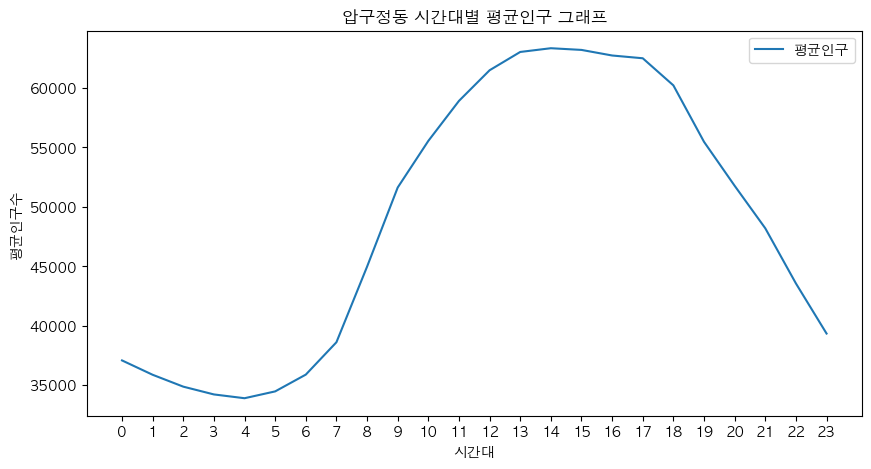

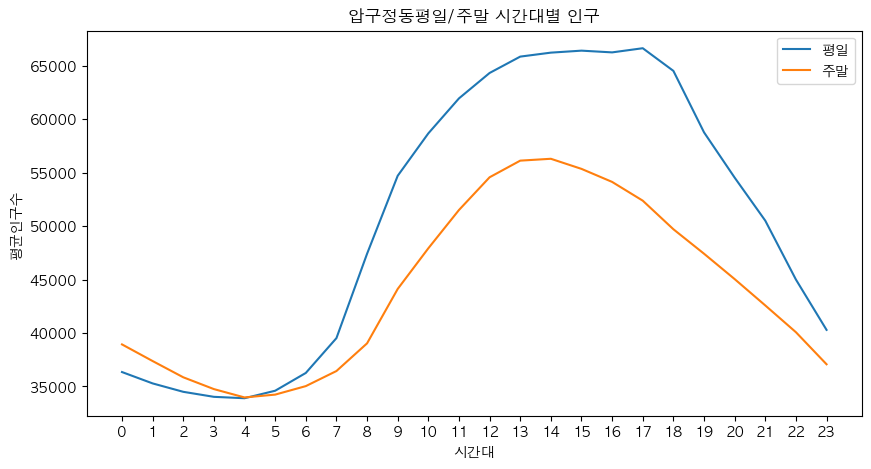

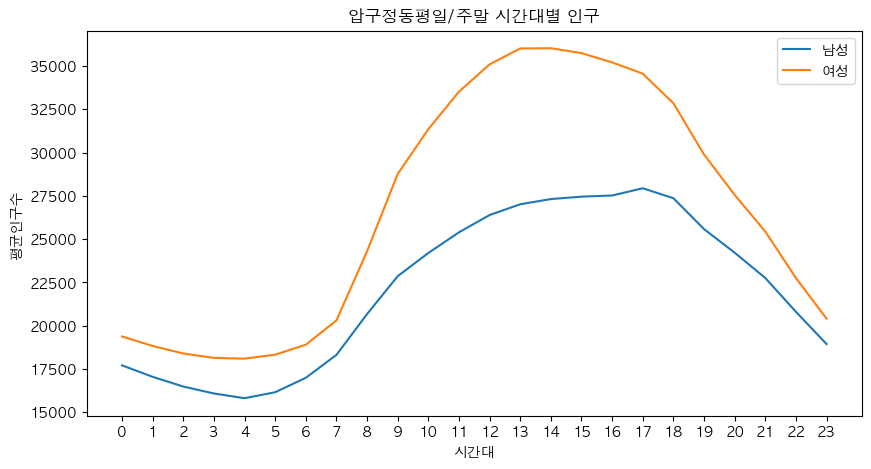

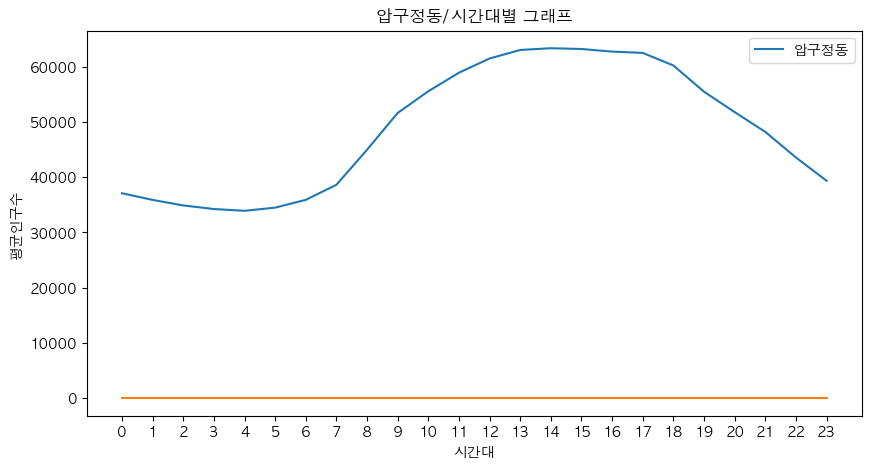

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/tuan/opt/anaconda3/envs/python39/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/h_/x54gcywx1sb2ryzqg8nxw5h40000gn/T/ipykernel_5559/2944352838.py", line 55, in dong_search2
    info.set(dong_name2 + '과' + dong_code2 + '을/를 분석합니다.')
TypeError: can only concatenate str (not "int") to str


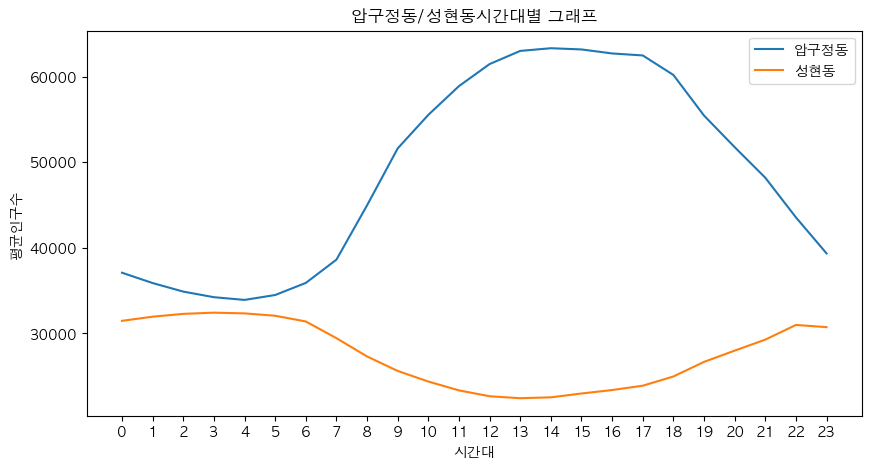

In [15]:
# 전역변수
data,code_data=file_open()
dong_name1, dong_code1 = '',''
dong_name2, dong_code2 = '',''

root = Tk()
root.title('지역별 맛집은, 언제가야 가장 덜 붐빌까?')
root.geometry("1200x800")

Menu = Frame(root)
Menu.grid(row=0, column=0)
Graph = Frame(root)
Graph.grid(row=1, column=0)

dong_ent1 = Entry(Menu, width=20)
dong_ent1.grid(row=0, column=0)

dong_btn1 = Button(Menu, text='인구분석 행정동 세팅', width=20, command=dong_search1)
dong_btn1.grid(row=0, column=1)

dong_ent2 = Entry(Menu, width=20)
dong_ent2.grid(row=0, column=2)

dong_btn2 = Button(Menu, text='비교할 행정동 세팅', width=20, command=dong_search2)
dong_btn2.grid(row=0, column=3)

info = StringVar()  # 동적변수 txt 정의(레이블에 동적변수 txt 설정)
dong_lbl = Label(Menu, textvariable = info, font=('AppleGothic', 12))
dong_lbl.grid(row=1, columnspan=4)
    
btn1 = Button(Graph, text='1. 평균인구 그래프', width=20, command=analysis1)
btn1.grid(row=1, column=0)

btn2 = Button(Graph, text='2. 주중/주말 그래프', width=20, command=analysis2)
btn2.grid(row=1, column=1)

btn3= Button(Graph, text='3. 남녀 그래프', width=20, command=analysis3)
btn3.grid(row=1, column=2)

btn4= Button(Graph, text='4. 지역 비교 그래프', width=20, command=analysis4)
btn4.grid(row=1, column=3)

graph_lbl = Label(Graph)
graph_lbl.grid(row=2, column=0, columnspan=5)

root.mainloop()